In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.io import write_html
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import statsmodels.api as sm

## Figure 9: Changes in Real WBA amounts between AWW WBA Max Indexers vs. Non-Indexers from 2003-2023

In [6]:
master = pd.read_csv("master.csv")
indexers_list = ['AR', 'CO', 'CT', 'DC', 'HI', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MA', 'ME', 'MN', 'MT', 'NC', 'ND', 'NJ', 'NM', 'NV', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TX', 'UT', 'VT', 'WA', 'WV', 'WY']
nonindexers_list = ['AK', 'AL', 'AZ', 'CA', 'DE', 'FL', 'GA', 'IN', 'MD', 'MI', 'MO', 'MS', 'NH', 'NY', 'TN', 'VA', 'WI']

In [15]:
master.columns

Index(['Unnamed: 0', 'Year', 'State', 'Replacement Ratio 1',
       'Replacement Ratio 2', 'Recipiency Rate', 'Average WBA', 'Minimum WBA',
       'Maximum WBA', 'Average Weekly Wage', 'Region', 'Annual Regional CPI-U',
       'Annualized State Inflation Rate', 'MET',
       'Real Average WBA (regional, 2000 base)',
       'Real Minimum WBA (regional, 2000 base)',
       'Real Maximum WBA (regional, 2000 base)',
       'Real Average WBA (state, 2000 base)',
       'Real Minimum WBA (state, 2000 base)',
       'Real Maximum WBA (state, 2000 base)',
       'Real Average WBA (regional, 2023 base)',
       'Real Minimum WBA (regional, 2023 base)',
       'Real Maximum WBA (regional, 2023 base)',
       'Real Average WBA (state, 2017 base)',
       'Real Minimum WBA (state, 2017 base)',
       'Real Maximum WBA (state, 2017 base)'],
      dtype='object')

In [91]:
master = master[master['Year'] >= 2003]
indexers = master[master['State'].isin(indexers_list)]
nonindexers = master[master['State'].isin(nonindexers_list)]

In [92]:
indexers.to_csv("indexers.csv")

In [93]:
nonindexers.to_csv("nonindexers.csv")

In [94]:
avg_indexers = indexers.groupby(['Year'])[['Real Average WBA (regional, 2023 base)',
                           'Real Maximum WBA (regional, 2023 base)']].aggregate('mean').round(2)

In [95]:
avg_nonindexers = nonindexers.groupby(['Year'])[['Real Average WBA (regional, 2023 base)',
                           'Real Maximum WBA (regional, 2023 base)']].aggregate('mean').round(2)

In [96]:
avg_indexers = avg_indexers.reset_index()
avg_indexers = avg_indexers.reset_index()
avg_indexers['Real Average WBA (regional, 2023 base)'] = (avg_indexers['Real Average WBA (regional, 2023 base)'] - 431.20) / 431.20 * 100
avg_indexers['Real Maximum WBA (regional, 2023 base)'] = (avg_indexers['Real Maximum WBA (regional, 2023 base)'] - 573.58) / 573.58 * 100
avg_indexers

,index,Year,"Real Average WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)"
0,0,2003,0.000000,0.000000
1,1,2004,-3.810297,-0.498623
2,2,2005,-4.246289,-0.754908
3,3,2006,-4.090909,-0.697374
4,4,2007,-3.172542,0.191778
5,5,2008,-2.342301,0.688657
6,6,2009,3.172542,3.610656
7,7,2010,0.204082,4.330695
8,8,2011,-4.526902,0.667736
9,9,2012,-4.448052,0.744447


In [97]:
avg_nonindexers = avg_nonindexers.reset_index()
avg_nonindexers = avg_nonindexers.reset_index()
avg_nonindexers['Real Average WBA (regional, 2023 base)'] = (avg_nonindexers['Real Average WBA (regional, 2023 base)'] - 393.39) / 393.39 * 100
avg_nonindexers['Real Maximum WBA (regional, 2023 base)'] = (avg_nonindexers['Real Maximum WBA (regional, 2023 base)'] - 494.01) / 494.01 * 100
avg_nonindexers

,index,Year,"Real Average WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)"
0,0,2003,0.000000,0.000000
1,1,2004,-3.985866,-1.271229
2,2,2005,-4.860317,-2.311694
3,3,2006,-5.689011,-3.803567
4,4,2007,-6.469407,-5.228639
5,5,2008,-6.972724,-6.192182
6,6,2009,-2.877552,-2.433149
7,7,2010,-6.189786,-3.287383
8,8,2011,-10.249371,-5.981660
9,9,2012,-11.934721,-7.894577


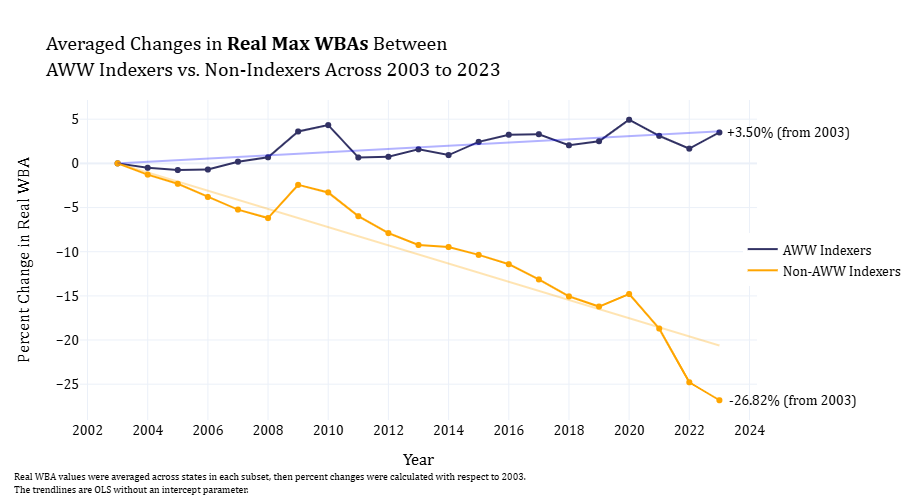

In [162]:
pio.templates.default = 'plotly_white'

X = avg_indexers["index"]
y = avg_indexers["Real Maximum WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(x_pred)
x_pred = x_pred + 2003

X = avg_nonindexers["index"]
y = avg_nonindexers["Real Maximum WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred2 = np.linspace(X.min(), X.max(), 100)
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2 + 2003

fig3 = px.line(data_frame = avg_indexers, 
             x = "Year", 
             y = "Real Maximum WBA (regional, 2023 base)")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="AWW Indexers", showlegend=True)

fig4= px.scatter(data_frame = avg_indexers, 
                x = "Year", 
                y = "Real Maximum WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig7 = px.line(data_frame = avg_nonindexers, 
             x = "Year", 
             y = "Real Maximum WBA (regional, 2023 base)")
fig7.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Non-AWW Indexers", showlegend=True)

fig8= px.scatter(data_frame = avg_nonindexers, 
                x = "Year", 
                y = "Real Maximum WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(255, 165, 0)"])

fig3 = go.Figure(data= fig3.data + fig4.data + fig7.data + fig8.data)

fig3.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=0.3,
    showlegend=False
))
fig3.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=0.3,
    showlegend=False
))


fig3.update_layout(title_text="Averaged Changes in <b>Real Max WBAs</b> Between<br>AWW Indexers vs. Non-Indexers Across 2003 to 2023",
                   xaxis_title="Year", yaxis_title="Percent Change in Real WBA",
                   height=500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=5
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.5
                    )
                  )
fig3.add_annotation(
    xref="paper", yref="paper",
    x=1.14, y=0.93,
    text="+3.50% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig3.add_annotation(
    xref="paper", yref="paper",
    x=1.15, y=0.03,
    text="-26.82% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig3.add_annotation(
    text='Real WBA values were averaged across states in each subset, then percent changes were calculated with respect to 2003.<br>The trendlines are OLS without an intercept parameter.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)

In [160]:
write_html(fig3, 'fig_9a.html')

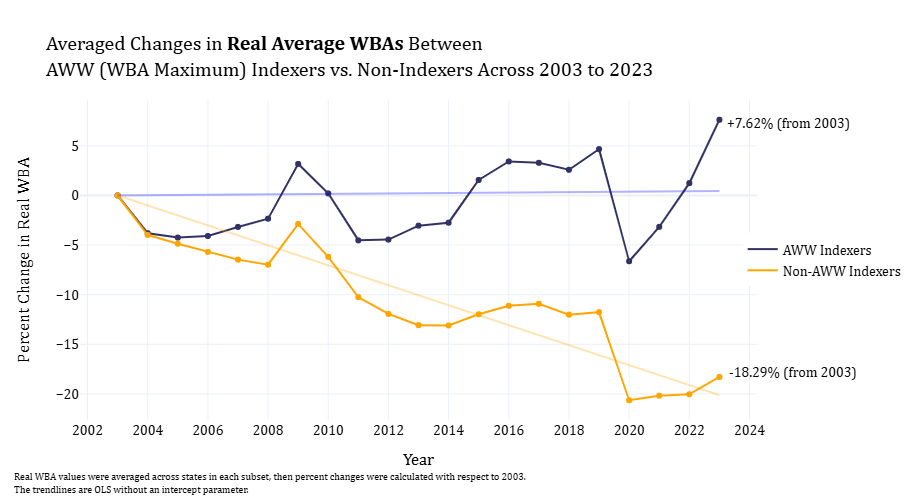

In [163]:
X = avg_indexers["index"]
y = avg_indexers["Real Average WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(x_pred)
x_pred = x_pred + 2003

X = avg_nonindexers["index"]
y = avg_nonindexers["Real Average WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred2 = np.linspace(X.min(), X.max(), 100)
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2 + 2003

fig1 = px.line(data_frame = avg_indexers, 
             x = "Year", 
             y = "Real Average WBA (regional, 2023 base)",
              )
fig1.update_traces(line=dict(color = 'rgba(50, 50, 100,1)'), name="AWW Indexers", showlegend=True)

fig2 = px.scatter(data_frame = avg_indexers, 
                x = "Year", 
                y = "Real Average WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig5 = px.line(data_frame = avg_nonindexers, 
             x = "Year", 
             y = "Real Average WBA (regional, 2023 base)",
              )
fig5.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Non-AWW Indexers", showlegend=True)

fig6 = px.scatter(data_frame = avg_nonindexers, 
                x = "Year", 
                y = "Real Average WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(255, 165, 0)"])

fig1 = go.Figure(data= fig1.data + fig2.data + fig5.data + fig6.data)

fig1.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=0.3,
    showlegend=False
))
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=0.3,
    showlegend=False
))
fig1.update_layout(title_text="Averaged Changes in <b>Real Average WBAs</b> Between<br>AWW (WBA Maximum) Indexers vs. Non-Indexers Across 2003 to 2023",
                   xaxis_title="Year", yaxis_title="Percent Change in Real WBA",
                   height=500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=5 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.5
                    )
                  )

fig1.add_annotation(
    xref="paper", yref="paper",
    x=1.14, y=0.96,
    text="+7.62% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig1.add_annotation(
    xref="paper", yref="paper",
    x=1.15, y=0.12,
    text="-18.29% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig1.add_annotation(
    text='Real WBA values were averaged across states in each subset, then percent changes were calculated with respect to 2003.<br>The trendlines are OLS without an intercept parameter.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)

In [161]:
write_html(fig1, "fig_9b.html")

## Figure 6: Re-running Regression of Change in Recipiency Rate against Percent Change in Real WBA, **weighted by size of state labor force**

In [320]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare variables
X = percent_changes_state[['% Change in Real Average WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_avg = model.coef_[0]
r_squared_avg = model.score(X, y)

# Prepare variables
X = percent_changes_state[['% Change in Real Maximum WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_max = model.coef_[0]
r_squared_max = model.score(X, y)

print(slope_avg, r_squared_avg, slope_max, r_squared_max)

0.2940361155849593 0.18903277692923737 0.15144783719801866 0.08933667877983109


In [358]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes_state[['% Change in Real Average WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.189
Model:                                               OLS   Adj. R-squared:                  0.163
Method:                                    Least Squares   F-statistic:                     7.226
Date:                                   Thu, 01 May 2025   Prob (F-statistic):             0.0115
Time:                                           21:13:20   Log-Likelihood:                -108.73
No. Observations:                                     33   AIC:                             221.5
Df Residuals:                                         31   BIC:                             224.5
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [322]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes_state[['% Change in Real Maximum WBA (2003-2017)']]
y = percent_changes_state['Change in Recipiency Rate (2003-2017)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.089
Model:                                               OLS   Adj. R-squared:                  0.060
Method:                                    Least Squares   F-statistic:                     3.041
Date:                                   Thu, 01 May 2025   Prob (F-statistic):             0.0911
Time:                                           20:24:18   Log-Likelihood:                -110.65
No. Observations:                                     33   AIC:                             225.3
Df Residuals:                                         31   BIC:                             228.3
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

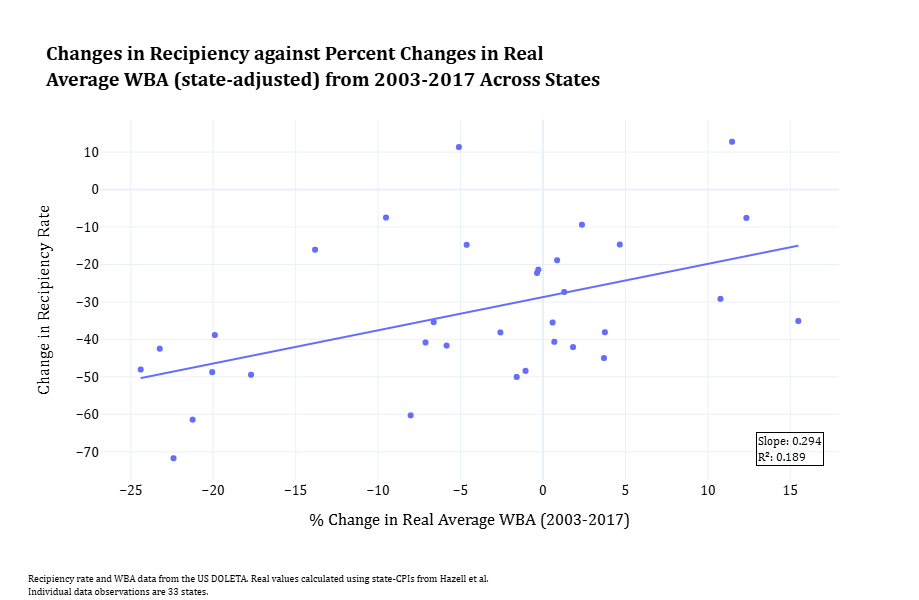

In [366]:
fig1 = px.scatter(data_frame = percent_changes_state,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
    
fig1.update_layout(title_text="<b>Changes in Recipiency against Percent Changes in Real <br>Average WBA (state-adjusted) from 2003-2017 Across States",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig1.update_layout(height=600, width=600)
tickvals=[-50, -25, 0, 25, 50]
fig1.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig1.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=0.04,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig1.update_layout(margin={"l":100,"b":120, "t":120})
fig1.show()

In [297]:
add_range_to_percent_changes(2003,2023).sort_values('% Change in Real Average WBA (2003-2023)', ascending=False)

,State,Change in Recipiency Rate (2003-2023),% Change in Recipiency Rate (2003-2023),Change in Real Average WBA (2003-2023),Change in Real Maximum WBA (2003-2023),% Change in Real Average WBA (2003-2023),% Change in Real Maximum WBA (2003-2023),% Change in Real Minimum WBA (2003-2023)
28,ND,-6.653704,-17.887148,99.00,126.83,45.065550,46.332286,-36.954915
42,SD,-6.657962,-28.065898,59.72,62.38,29.766236,27.422191,-36.927734
26,MT,-8.924672,-20.027769,56.15,79.37,27.380894,28.833509,61.405672
48,WA,-14.171333,-31.291816,80.16,79.53,26.404902,17.300037,72.542099
29,NE,-19.925569,-52.900073,47.70,58.63,23.328606,23.707088,22.601530
12,IA,-21.795223,-49.270907,53.80,52.34,22.665993,18.989914,20.251293
19,MA,-3.788293,-6.876171,68.39,110.24,21.367869,23.452325,23.317218
21,ME,-6.939450,-18.721570,45.33,45.21,20.958942,17.230734,18.291878
37,OR,-8.636084,-18.629716,48.52,47.28,19.709156,12.595572,14.593968
47,VT,-14.790155,-26.712017,44.79,56.49,18.757067,17.359105,4818.279570


In [275]:
percent_changes.to_csv("percent_changes.csv")

In [216]:
del percent_changes_sliding
percent_changes_sliding = add_range_to_percent_changes(2002, 2012)
for year in range(2003,2014):
    percent_changes_sliding = percent_changes_sliding.merge(add_range_to_percent_changes(year, year+10), on='State', how='left')
percent_changes_sliding = percent_changes_sliding.dropna()
#drop puerto rico

In [217]:
percent_changes_sliding.to_csv("percent_changes_sliding.csv")

In [218]:
len(percent_changes_sliding)

51

In [220]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

def get_slope_r_squared_sliding(data):
    year_start = []
    year_end = []
    r_squared_avgs = []
    slope_avgs = []
    r_squared_maxs = []
    slope_maxs = []
    
    for year in range(2002, 2014):
        start = year
        end = year+10
        year_start.append(start)
        year_end.append(end)
        
        # Prepare variables
        X = data[[f'% Change in Real Average WBA ({start}-{end})']]
        y = data[f'Change in Recipiency Rate ({start}-{end})']

        # Fit OLS model
        model = LinearRegression()
        model.fit(X, y)

        # Get slope and R^2
        slope_avg = model.coef_[0]
        slope_avgs.append(slope_avg)
        r_squared_avg = model.score(X, y)
        r_squared_avgs.append(r_squared_avg)

        # Prepare variables
        X = data[[f'% Change in Real Maximum WBA ({start}-{end})']]
        y = data[f'Change in Recipiency Rate ({start}-{end})']

        # Fit OLS model
        model = LinearRegression()
        model.fit(X, y)

        # Get slope and R^2
        slope_max = model.coef_[0]
        slope_maxs.append(slope_max)
        r_squared_max = model.score(X, y)
        r_squared_maxs.append(r_squared_max)
        
    df = pd.DataFrame()
    df['Year Start'] = year_start
    df['Year End'] = year_end
    df['r_squared_avgs'] = r_squared_avgs
    df['slope_avgs'] = slope_avgs
    df['r_squared_maxs'] = r_squared_maxs
    df['slope_maxs'] = slope_maxs

    return df

In [233]:
sliding_lm = get_slope_r_squared_sliding(percent_changes_sliding)
sliding_lm

,Year Start,Year End,r_squared_avgs,slope_avgs,r_squared_maxs,slope_maxs
0,2002,2012,0.059629,0.157886,0.025171,0.084666
1,2003,2013,0.267180,0.263652,0.085142,0.125549
2,2004,2014,0.317014,0.241067,0.096456,0.112600
3,2005,2015,0.432673,0.290933,0.270820,0.230430
4,2006,2016,0.380279,0.300898,0.286013,0.246494
5,2007,2017,0.261057,0.311021,0.186426,0.216588
6,2008,2018,0.204212,0.308344,0.122655,0.204059
7,2009,2019,0.045415,0.186438,0.117942,0.263570
8,2010,2020,0.045837,0.356509,0.052059,0.368062
9,2011,2021,0.000082,0.007120,0.024022,0.105942


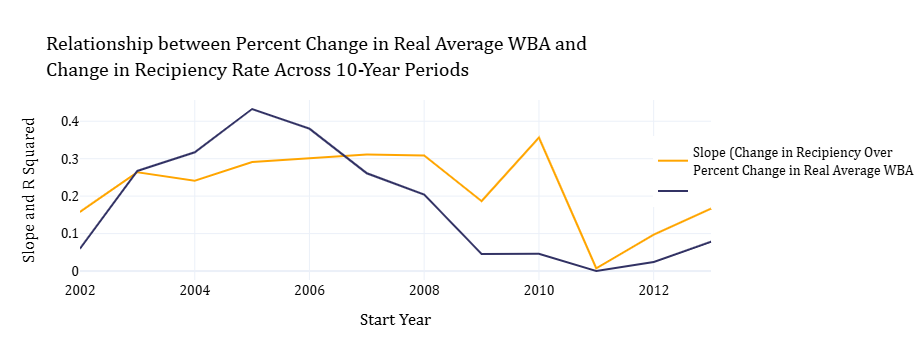

In [249]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = sliding_lm, 
             x = "Year Start", 
             y = "slope_avgs",
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Slope (Change in Recipiency Over <br>Percent Change in Real Average WBA", showlegend=True)

fig3 = px.line(data_frame = sliding_lm, 
             x = "Year Start", 
             y = "r_squared_avgs")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="$$R^2$$", showlegend=True)

fig1 = go.Figure(data=fig1.data + fig3.data)
fig1.update_layout(title_text="Relationship between Percent Change in Real Average WBA and <br>Change in Recipiency Rate Across 10-Year Periods</b>",
                   xaxis_title="Start Year", yaxis_title="Slope and R Squared",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )

fig1.show()

In [307]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare variables
X = percent_changes[['% Change in Real Average WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_avg = model.coef_[0]
r_squared_avg = model.score(X, y)

# Prepare variables
X = percent_changes[['% Change in Real Maximum WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_max = model.coef_[0]
r_squared_max = model.score(X, y)

print(slope_avg, r_squared_avg, slope_max, r_squared_max)

0.48137548834602223 0.17230880279714744 0.33800278534325606 0.11843167605548


In [308]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes[['% Change in Real Average WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.172
Model:                                                 OLS   Adj. R-squared:                  0.156
Method:                                      Least Squares   F-statistic:                     10.41
Date:                                     Thu, 01 May 2025   Prob (F-statistic):            0.00221
Time:                                             00:10:01   Log-Likelihood:                -228.88
No. Observations:                                       52   AIC:                             461.8
Df Residuals:                                           50   BIC:                             465.7
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [309]:
X = percent_changes[['% Change in Real Maximum WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.118
Model:                                                 OLS   Adj. R-squared:                  0.101
Method:                                      Least Squares   F-statistic:                     6.717
Date:                                     Thu, 01 May 2025   Prob (F-statistic):             0.0125
Time:                                             00:10:06   Log-Likelihood:                -230.52
No. Observations:                                       52   AIC:                             465.0
Df Residuals:                                           50   BIC:                             469.0
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


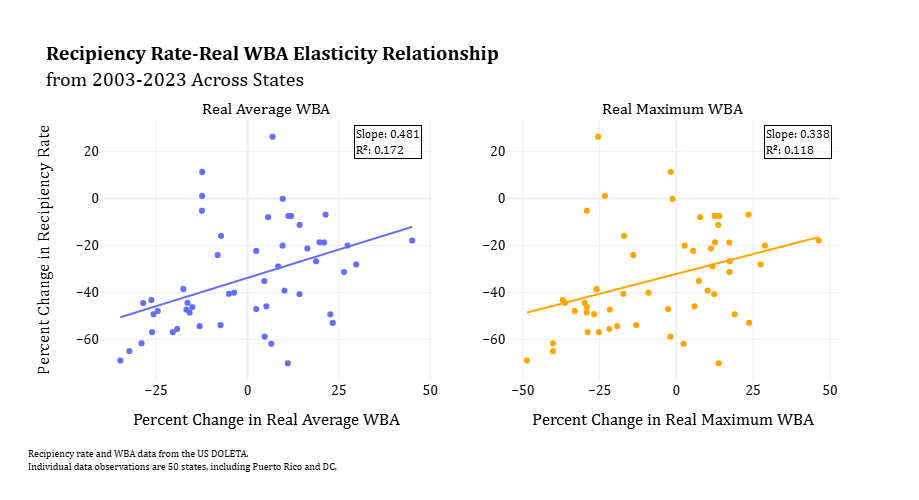

In [310]:
fig1 = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
fig2 = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'],
                 trendline='ols')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Elasticity Relationship</b> <br>from 2003-2023 Across States",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-50, -25, 0, 25, 50]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()